<a href="https://colab.research.google.com/github/xuanhanhmy/LA_Traffic_Collisions_EDA/blob/main/LA_Traffic_Collisions_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing library
!pip install sodapy
!pip install holidays
!pip install geopandas
!pip install geoplot

import pandas as pd
import numpy as np
import itertools
from sodapy import Socrata
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns
import math
import holidays
import plotly.express as px
import geopandas as gpd
import geoplot as gplt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.6 MB/s 
     |████████████████████████████████| 6.3 MB 39.9 MB/s 
     |████████████████████████████████| 16.7 MB 333 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 10.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 26.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 25.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build whe

#1. Data Prep


In [27]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)

# Results returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("d5tf-ez2w", limit = 600000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)


In [ ]:
#Dataframe overview
results_df.head(10)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,crm_cd,crm_cd_desc,mocodes,...,premis_desc,location,cross_street,location_1,:@computed_region_qz3q_ghft,:@computed_region_k96s_3jcv,:@computed_region_tatf_ua23,:@computed_region_ur2y_g4cx,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s
0,190319651,2019-08-24T00:00:00.000,2019-08-24T00:00:00.000,0450,03,Southwest,0356,997,TRAFFIC COLLISION,3036 3004 3026 3101 4003,...,STREET,JEFFERSON BL,NORMANDIE AV,"{'latitude': '34.0255', 'longitude': '-118.300...",22724,691,916,7,14,32
1,190319680,2019-08-30T00:00:00.000,2019-08-30T00:00:00.000,2320,03,Southwest,0355,997,TRAFFIC COLLISION,3037 3006 3028 3030 3039 3101 4003,...,STREET,JEFFERSON BL,W WESTERN,"{'latitude': '34.0256', 'longitude': '-118.308...",23079,686,919,7,12,19
2,190413769,2019-08-25T00:00:00.000,2019-08-25T00:00:00.000,0545,04,Hollenbeck,0422,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,...,STREET,N BROADWAY,W EASTLAKE AV,"{'latitude': '34.0738', 'longitude': '-118.207...",23448,488,516,NaN,11,1
3,190127578,2019-11-20T00:00:00.000,2019-11-20T00:00:00.000,0350,01,Central,0128,997,TRAFFIC COLLISION,0605 3101 3401 3701 3011 3034,...,STREET,1ST,CENTRAL,"{'latitude': '34.0492', 'longitude': '-118.239...",22728,536,1502,NaN,9,28
4,190319695,2019-08-30T00:00:00.000,2019-08-30T00:00:00.000,2100,03,Southwest,0374,997,TRAFFIC COLLISION,0605 4025 3037 3004 3025 3101,...,STREET,MARTIN LUTHER KING JR,ARLINGTON AV,"{'latitude': '34.0108', 'longitude': '-118.318...",22725,747,1017,7,14,35
5,190411883,2019-07-06T00:00:00.000,2019-07-06T00:00:00.000,0950,04,Hollenbeck,0423,997,TRAFFIC COLLISION,3101 3401 3701 3003 3025 3029,...,STREET,MAIN,JOHNSTON,"{'latitude': '34.066', 'longitude': '-118.2102...",23448,494,619,NaN,11,1
6,190514552,2019-08-23T00:00:00.000,2019-08-23T00:00:00.000,1843,05,Harbor,0514,997,TRAFFIC COLLISION,0605 3037 3003 3026 3029 3101,...,STREET,I ST,KING AV,"{'latitude': '33.7807', 'longitude': '-118.275...",3350,956,1201,NaN,15,15
7,190319665,2019-08-31T00:00:00.000,2019-08-30T00:00:00.000,2200,03,Southwest,0333,997,TRAFFIC COLLISION,4025 3037 3002 3028,...,STREET,CRENSHAW BL,28TH ST,"{'latitude': '34.0312', 'longitude': '-118.335...",23079,662,926,7,12,19
8,190319702,2019-08-31T00:00:00.000,2019-08-31T00:00:00.000,1330,03,Southwest,0356,997,TRAFFIC COLLISION,3036 4025 3004 3026 3101,...,STREET,WESTERN AV,36TH ST,"{'latitude': '34.0228', 'longitude': '-118.308...",23079,687,1295,7,14,32
9,190413937,2019-08-29T00:00:00.000,2019-08-27T00:00:00.000,1030,04,Hollenbeck,0424,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030,...,STREET,3500 VALLEY BL,NaN,"{'latitude': '34.07', 'longitude': '-118.1998'...",23448,487,337,NaN,11,1


In [28]:
#Selecting desired columns
results_df = results_df.iloc[:, :18]

#Extracting latiude and longitude
results_df = results_df.join(pd.json_normalize(results_df.location_1))
#Dropping unneccessary columns
results_df.drop(columns=['date_rptd', 'crm_cd', 'area', 'crm_cd_desc', 'premis_cd', 'premis_desc', 'location_1', 'human_address'], inplace=True)

#Reformating date and time
results_df.date_occ = pd.to_datetime(results_df.date_occ)
results_df['time_occ'] = results_df['time_occ'].str.lstrip('0')
results_df['time_occ'] = ((pd.to_numeric(results_df['time_occ']) / 100).apply(np.ceil)).astype(int)

results_df.head(10)

,dr_no,date_occ,time_occ,area_name,rpt_dist_no,mocodes,vict_age,vict_sex,vict_descent,location,cross_street,latitude,longitude
0,190319651,2019-08-24,5,Southwest,0356,3036 3004 3026 3101 4003,22,M,H,JEFFERSON BL,NORMANDIE AV,34.0255,-118.3002
1,190319680,2019-08-30,24,Southwest,0355,3037 3006 3028 3030 3039 3101 4003,30,F,H,JEFFERSON BL,W WESTERN,34.0256,-118.3089
2,190413769,2019-08-25,6,Hollenbeck,0422,3101 3401 3701 3006 3030,NaN,M,X,N BROADWAY,W EASTLAKE AV,34.0738,-118.2078
3,190127578,2019-11-20,4,Central,0128,0605 3101 3401 3701 3011 3034,21,M,H,1ST,CENTRAL,34.0492,-118.2391
4,190319695,2019-08-30,21,Southwest,0374,0605 4025 3037 3004 3025 3101,49,M,B,MARTIN LUTHER KING JR,ARLINGTON AV,34.0108,-118.3182
5,190411883,2019-07-06,10,Hollenbeck,0423,3101 3401 3701 3003 3025 3029,60,M,H,MAIN,JOHNSTON,34.066,-118.2102
6,190514552,2019-08-23,19,Harbor,0514,0605 3037 3003 3026 3029 3101,73,M,H,I ST,KING AV,33.7807,-118.2756
7,190319665,2019-08-30,22,Southwest,0333,4025 3037 3002 3028,39,M,B,CRENSHAW BL,28TH ST,34.0312,-118.3351
8,190319702,2019-08-31,14,Southwest,0356,3036 4025 3004 3026 3101,48,M,H,WESTERN AV,36TH ST,34.0228,-118.3089
9,190413937,2019-08-27,11,Hollenbeck,0424,3101 3401 3701 3006 3030,68,M,H,3500 VALLEY BL,NaN,34.07,-118.1998


In [29]:
results_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577808 entries, 0 to 577807
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   dr_no         577808 non-null  object        
 1   date_occ      577808 non-null  datetime64[ns]
 2   time_occ      577808 non-null  int64         
 3   area_name     577808 non-null  object        
 4   rpt_dist_no   577808 non-null  object        
 5   mocodes       490805 non-null  object        
 6   vict_age      493838 non-null  object        
 7   vict_sex      568539 non-null  object        
 8   vict_descent  567639 non-null  object        
 9   location      577808 non-null  object        
 10  cross_street  550319 non-null  object        
 11  latitude      577808 non-null  object        
 12  longitude     577808 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 57.3+ MB


# 2. Data Exploration



## 2.1 By Age

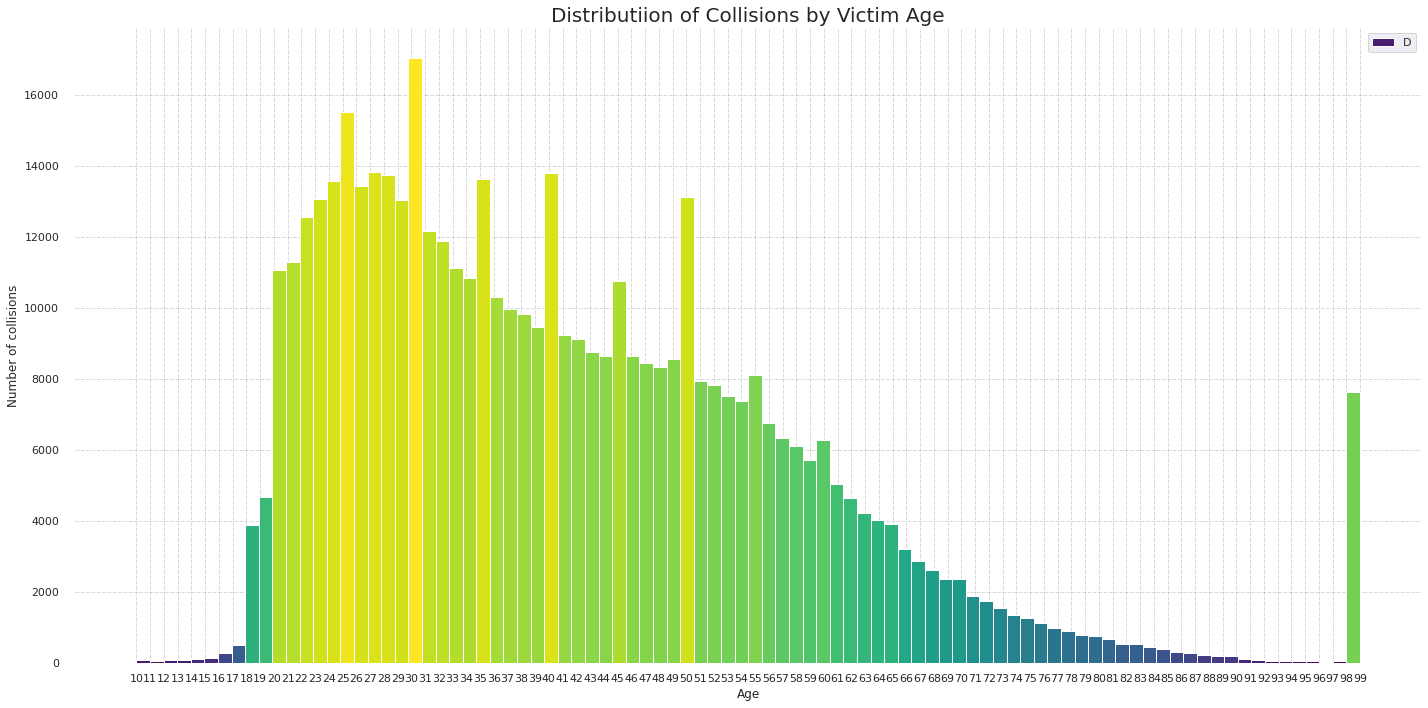

In [31]:

time_age = results_df[['date_occ', 'vict_age']]
time_age = time_age.dropna(axis = 0).sort_values(by = 'vict_age')
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 10),
                        tight_layout = True)
 
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)
 
# Remove x, y ticks
axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')
   
# Add padding between axes and labels
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
axs.set_facecolor("white")
 
# Creating histogram
N, bins, patches = axs.hist(time_age['vict_age'], bins = len(pd.unique(time_age['vict_age'])))
 
# Setting color
fracs = ((N**(1/5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Age")
plt.ylabel("Number of collisions")
plt.legend("Dsitribution")
plt.title('Distributiion of Collisions by Victim Age', fontdict = {'fontsize' : 20})
 
# Show plot
plt.show()



*   According to the histogram, a hike in number of collison victims starts from the age of 18 with a astounding double in size when people reach their 20s.
*   Majority of victims are in their 20s and the number decreases gradually from age 30.
*   Spike at age that is a multiple of 5 (i.e 25, 30, 35, etc.) indicates that the reported age can sometimes be estimated and not reflect the actual victim age (inaccessibility to official identification documents for instance).
*   Age 99 might be a default age for missing information and mot demonstrate an actual insight.

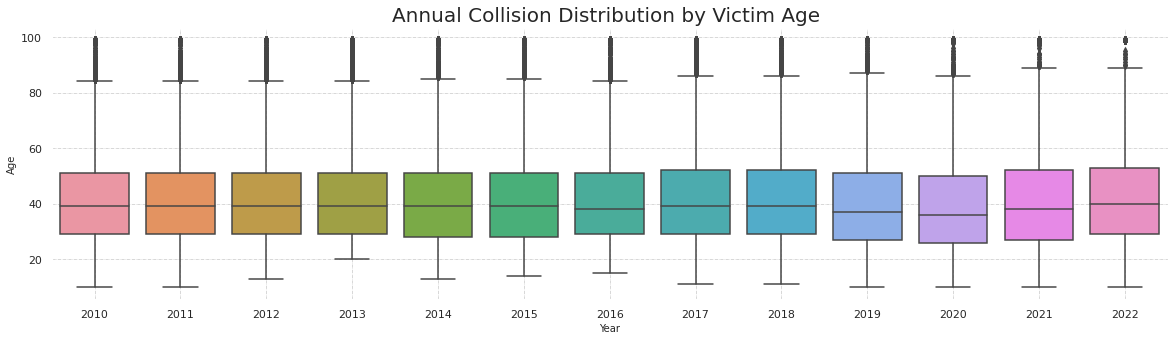

In [35]:
time_age['year'] = pd.DatetimeIndex(time_age['date_occ']).year
time_age.set_index('year')
time_age['vict_age'] = pd.to_numeric(time_age['vict_age'] )
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = time_age['year'], 
                y = time_age['vict_age'], 
                ax = ax)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)
ax.set_facecolor("white")

# Set labels
ax.set_xlabel( "Year" , size = 10 )
ax.set_ylabel( "Age" , size = 10 )
ax.set_title( "Annual Collision Distribution by Victim Age " , size = 20 )
  
# Display figure
plt.show()

From the box plots, we can obsreve a pretty steady distribution throughout years for collision victims age with the IQR stating from mid 20s to mid 40s and long whiskers from under 20 to around age of 80. However, there is a mild downward shift for the age range in 2019 and 2020.

##2.2 By Gender/Sex and Race/Descent


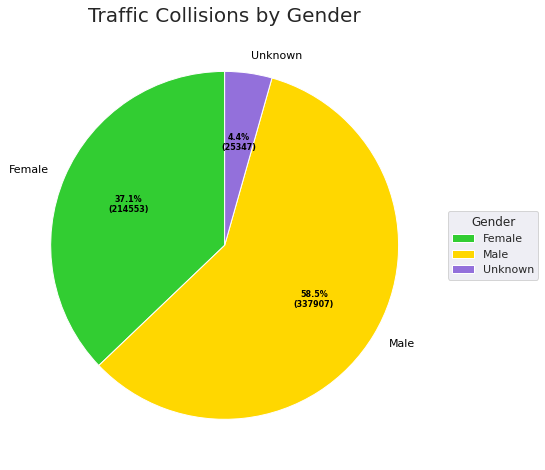

In [36]:
#Fill null values with X - unknown
results_df['vict_sex'] = results_df['vict_sex'].fillna('X')
gender = results_df.groupby('vict_sex').size()
#Combine values into 3 categories only: Female, Male, Unknown
colli_count = [gender.loc['F'], gender.loc['M'], (gender.loc['X'] + gender.loc['H'] + gender.loc['N'])]
gender_labels = ['Female', 'Male', 'Unknown']

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 8))
wedges, texts, autotexts = ax.pie(colli_count,
                                  autopct = lambda pct: func(pct, colli_count),
                                  labels = gender_labels,
                                  colors = ('limegreen', 'gold', 'mediumpurple'),
                                  startangle = 90,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, gender_labels,
          title ="Gender",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Traffic Collisions by Gender", fontdict={'fontsize' : 20})
 
# show plot
plt.show()


Most victims are males with 58.5% of total reported collisions. This leaves 37.1% of victims are female and 4.4% is unknown.

In [26]:
#Pivot dataframe and replace race codes
results_df['vict_descent'] = results_df['vict_descent'].fillna('X')
gender_race = pd.DataFrame(results_df.groupby(by = ['vict_descent', 'vict_sex'], as_index = False).size())
gender_race = gender_race.pivot(index='vict_descent', columns='vict_sex', values= 'size')
gender_race = gender_race.fillna(0)
gender_race['Unknown']= gender_race['H'] + gender_race['N'] + gender_race['X']
gender_race = gender_race.reset_index()
gender_race = gender_race.drop(columns = ['H', 'N', 'X'])

#Replacing code with legibel descent
race = [['A', 'Other Asian'], ['B', 'Black'], ['C', 'Chinese'], ['D', 'Cambodian'],
        ['F', 'Filipino'], ['G', 'Guamanian'], ['H', 'Hispanic/Latin/Mexican'], 
        ['I', 'American Indian/Alaskan Native'], ['J', 'Japanese'], ['K', 'Korean'],
        ['L', 'Laotian'], ['O' , 'Other'], ['P','Pacific Islander'], ['S', 'Samoan'],
        ['U', 'Hawaiian'], ['V', 'Vietnamese'], ['W', 'White'], ['X', 'Unknown'], 
        ['Z', 'Asian Indian'], ['-', 'Unknown']]

for code, desc in race:
  gender_race.loc[(gender_race.vict_descent == code),'vict_descent'] = desc

#Sorting descent/race from least to most collisions
gender_race['total'] = gender_race['Unknown'] + gender_race['F'] + gender_race['M']
gender_race = gender_race.groupby('vict_descent').sum().sort_values(by = 'total')
gender_race = gender_race.drop(columns = 'total')

vict_sex,F,M,Unknown
vict_descent,,,
Laotian,5.0,2.0,0.0
Cambodian,8.0,9.0,0.0
Samoan,12.0,23.0,1.0
Guamanian,14.0,32.0,1.0
Asian Indian,64.0,93.0,0.0
American Indian/Alaskan Native,68.0,109.0,1.0
Pacific Islander,100.0,107.0,0.0
Vietnamese,117.0,124.0,1.0
Japanese,180.0,157.0,0.0


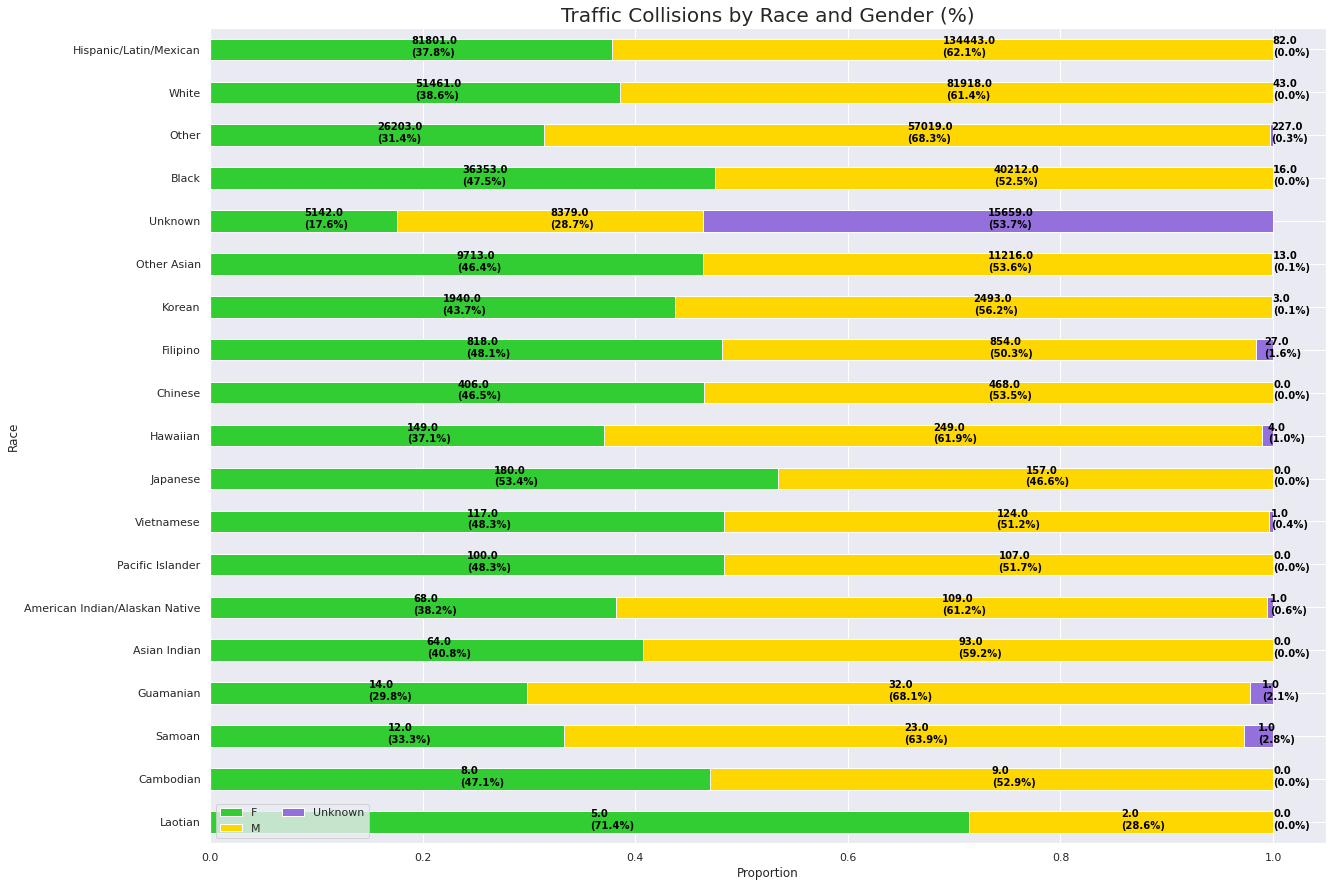

In [39]:

#Calculating percentage of collisions broke down by gender for each race
gender_race_prop = gender_race.div(gender_race.sum(axis=1), axis=0) 
gender_race_prop
#Plotting the percentage stacked bar chart
gender_race_prop.plot(kind='barh', 
                  stacked=True, 
                  color= ['limegreen', 'gold', 'mediumpurple'], 
                  figsize=(20, 15))

plt.legend(loc="lower left", ncol=2)
plt.ylabel("Race")
plt.xlabel("Proportion")
plt.title("Traffic Collisions by Race and Gender (%)", fontdict= {'fontsize' : 20})

#Adding labels
for n, x in enumerate([*gender_race_prop.index.values]):
    for (proportion, count, y_loc) in zip(gender_race_prop.loc[x],
                                          gender_race.loc[x],
                                          gender_race_prop.loc[x].cumsum()):
                
        plt.text(x=(y_loc - proportion) + (proportion / 2),
                 y= n - 0.15,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()


* Based on the chart, we don't see any clear impact of races/descents on the breakdown of sex categories when majority of collision victims are still male.
* People with Hispanic/Latin/Mexican heritage are mostlt likely to be victims of traffic collisions in LA, following by white, black, and asian people.

##2.3 By Time
###2.3.1 Daily

In [41]:
#Prepare dataframe for plotting
day_time = results_df[['date_occ', 'time_occ']]
day_time['day_of_week'] = day_time['date_occ'].dt.day_name()
day_time_count = pd.DataFrame(day_time.groupby(['time_occ', 'day_of_week'], as_index = False).size())

sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day_time_count = day_time_count.pivot(index='day_of_week', columns='time_occ', values='size')
day_time_count = day_time_count.groupby(['day_of_week']).sum().reindex(sorter) 
day_time_count

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


time_occ,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
day_of_week,,,,,,,,,,,,,,,,,,,,,
Sunday,4383,3764,3725,2322,1534,1227,1234,1512,1813,2274,...,4293,4258,4081,4367,4131,4066,4157,3790,3135,2052
Monday,2344,1621,1366,831,818,1151,2111,4360,4179,3734,...,5056,5413,5273,5884,5030,3835,3205,2880,2354,1633
Tuesday,1797,1100,949,618,597,1104,2125,4946,4684,4058,...,5075,5477,5431,6041,5258,4126,3341,2933,2448,1692
Wednesday,1851,1214,993,736,645,1067,2124,4801,4635,3854,...,5083,5421,5418,6105,5483,4308,3461,3154,2663,1761
Thursday,1976,1359,1142,723,666,1061,2178,4813,4489,3778,...,5065,5625,5585,6175,5483,4243,3627,3314,2910,2051
Friday,2270,1672,1519,940,767,1275,2094,4339,4355,3770,...,5587,6264,6142,6576,5908,4956,4407,4009,3858,2905
Saturday,3715,3058,3336,1905,1384,1294,1375,1947,2359,2895,...,4929,4696,4558,4722,4671,4393,4394,4293,4094,3186


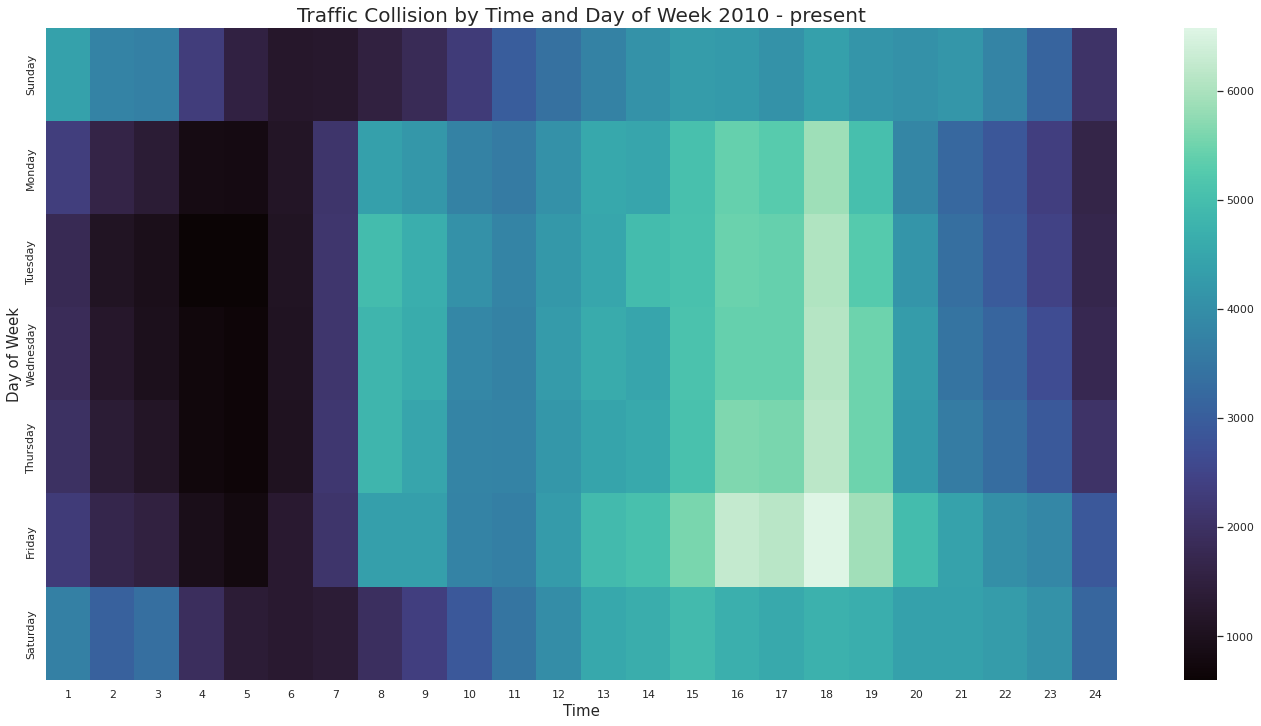

In [42]:
fig3, ax3 = plt.subplots(figsize=(24,12))
sns.heatmap(day_time_count, cmap="mako", ax = ax3)
# Set labels
ax3.set_xlabel("Time" , size = 15 )
ax3.set_ylabel( "Day of Week" , size = 15 )
ax3.set_title( "Traffic Collision by Time and Day of Week 2010 - present" , size = 20 )
  
# Display figure
plt.show()

There are clear diffferences between weekdays and weekend:
* On Saturday and Sunday, collisions don't decrease in number until after 3AM and starts to rise again from 8AM. The number will stay consistent through out the day from around 1PM to 10PM.
* On weekdays, number of collisions stay lowest from midnight until 7AM. Time with most collisions during weekdays are from 7AM - 9AM and 4PM - 8PM. These time frames correlate with normal rush hours when people travel between their houses and workplaces.

Out of all days, Friday experiences highest number of collions for 1 hour from 5PM - 6PM.

In [43]:
daily_count = pd.DataFrame(day_time.groupby(['date_occ'], as_index = False).size())

la_holidays = holidays.US(state= 'CA')
daily_count['holiday'] = [la_holidays.get(daily_count.iloc[i, 0]) for i in range(len(daily_count))]
daily_count = pd.DataFrame(daily_count.groupby(['holiday'], as_index = False)['size'].sum())
daily_count.sort_values(by='size', ascending=False)


,holiday,size
3,César Chávez Day,1539
2,Columbus Day,1503
11,New Year's Day,1500
6,Independence Day,1471
15,Veterans Day,1427
9,Martin Luther King Jr. Day,1302
10,Memorial Day,1285
8,Labor Day,1250
5,Day After Thanksgiving,1217
14,Thanksgiving,1102



* César Chávez Day is the holiday with most recorded collisons in LA. This is a state holiday for California and only get celebrated by few other states. 


In [44]:
month_year = pd.DataFrame(results_df['date_occ'])
month_year['month'] = pd.DatetimeIndex(month_year['date_occ']).month
month_year['year'] = pd.DatetimeIndex(month_year['date_occ']).year
month_year_freg = pd.crosstab(month_year['year'], month_year['month'])
month_year_freg = month_year_freg.reset_index()
month_year_freg.rename(columns = {'year':'Year', 1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June",
            7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}, inplace = True)

In [51]:
# Create the chart:
fig = px.parallel_coordinates(
    month_year_freg, 
    color= 'Year',
    dimensions = month_year_freg.columns,
    color_continuous_midpoint=month_year_freg['Year'].mean(),
    title= 'Monthly Traffic Collisions 2010 - present')

# Show the plot
fig.show()

**PLEASE OPEN THE NOTEBOOK LINK TO VIEW PLOT**

From 2010 to 2014, we can observe the same monthly trend in number of collisions: 
* The lines stay constant between 3500 and 4000 from January to May with a speed run in collision numbers from February to March.
* Starting from June, the collision numbers bump up from low 3500 to slightly over 4000 in August. Numbers then drop in September before reaching annual maximum in October and fluctuating around 4000 until year end.

The same pattern also appears from 2015 to 2019. However, 2015 marks a significant increase in collion numbers for every month, rising the range to 4000 - 4500 during first year half and almost reaching 5000 in August and October. The range contines to be pushed up by 500 for each month from 2016 to early 2020.

April 2020 experiences a drastic decrease from 4500 to just under 2500 due to COVID outbreak and social distiancing rules. After April, the number rockets to close to almost 4000 in October and starts another drop for the next 2 years. The collisions number hits all-time low in February 2022 at 1272 and has a slight increase to 1447 in May 2022. 

This might be a result of remote working culture and decrease in tourist visits due to COVID.

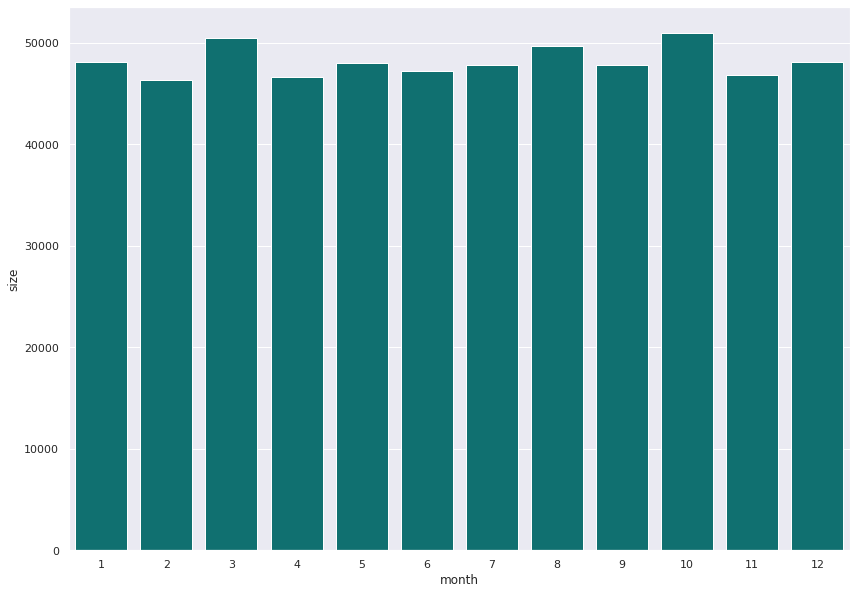

In [46]:

month_count = pd.DataFrame(month_year.groupby(['month'], as_index = False).size())

# Set the figure size
plt.figure(figsize=(14, 10))

# plot a bar chart with given order of bars ["Fri","Thur","Sun","Sat"]
sns.barplot(
    x="month", 
    y="size", 
    data=month_count,  
    color='teal'
);

Because the data is only updated to July 2022 by the time of this analysis, no definite conclusions should be made for the monthly number of collisions. However, some points need notice here:
* Overall, the fist year half records fewer collisions compared to the second half.
* March, August, October are 3 months with highest collisions reported.

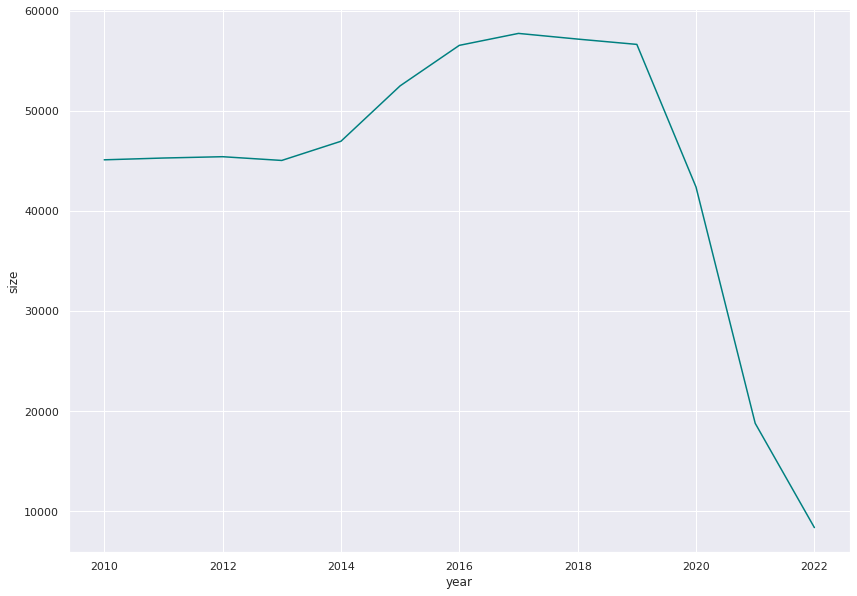

In [47]:
year_count = pd.DataFrame(month_year.groupby(['year'], as_index = False).size())

# Set the figure size
plt.figure(figsize=(14, 10))

sns.lineplot(x = "year", y = "size", data = year_count, color='teal')
plt.show()

According to the line plot, the collision numbers stay constant from 2010 to 2013 at arround 45000. Staring from 2014, the line rises from over 45000 to around 57000 collisons in 2017 and stagnates at this level until end of 2019 when COVID happens. From 2019, the collision numbers drop by almost 5 times in 2021. Since the data is updated weekly, the total number of collisions in 2022 are not official yet and should be disregarded for this plot analysis.

##2.4 By Location


In [49]:
#Connecting to personal Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

#File path for the LAPD_Divisions file
geoData = gpd.read_file('/content/gdrive/MyDrive/Colab Notebooks/LA Traffic Collisions/LAPD_Divisions.geojson')

#Preparing data for later merge
area_count = pd.DataFrame(results_df.groupby('area_name', as_index = False).size())
area_count['area_name'] = area_count['area_name'].str.upper()
area_count.loc[8, 'area_name'] = 'NORTH HOLLYWOOD'
area_count.loc[18, 'area_name'] = 'WEST LOS ANGELES'

geocode_count = geoData.merge(area_count, left_on=['APREC'], right_on=['area_name'])

#Extracting longitude and latitude
geocode_count['coords'] = geocode_count['geometry'].apply(lambda x: x.centroid.coords[:])
geocode_count['coords'] = [coords[0] for coords in geocode_count['coords']]



Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.



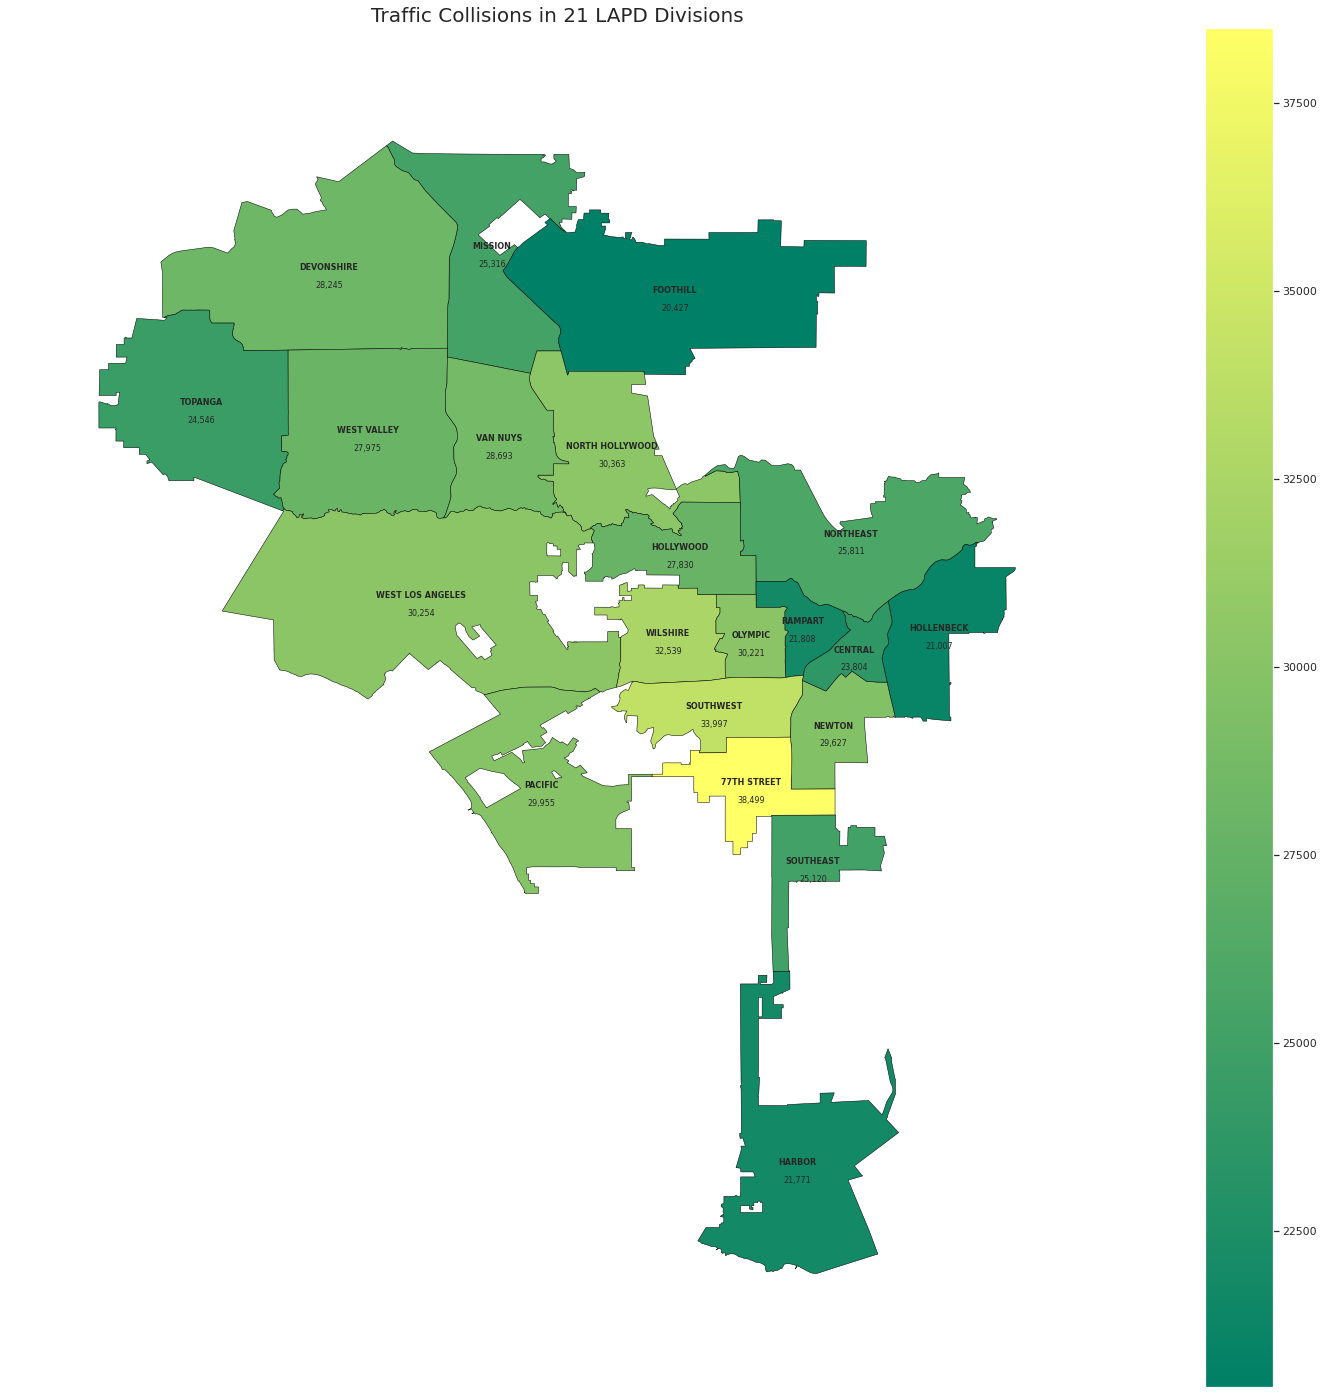

In [50]:
fig, ax = plt.subplots(figsize=(35, 25))

# Map
gplt.choropleth(geocode_count, 
    hue="size", 
    cmap='summer',
    linewidth=0.5,
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Traffic Collisions in 21 LAPD Divisions', fontsize=20);

for _, row in geocode_count.iterrows():
  hue = round(row['size'],2)
  
  #Setting labels for each area
  plt.text(s=row['area_name'], x = row['coords'][0], y = row['coords'][1],
           horizontalalignment='center', fontdict = {'weight': 'bold', 'size': 8})
  plt.text(s=f'{hue:,}', x=row['coords'][0],y = row['coords'][1] - 0.01,
          horizontalalignment='center', fontdict = {'size': 8, })

Based on the choropleth map above, most collisions will occur in the area of 77th Street Station with Southwest following in second. It is worth mentioning that these are not considered downtown LA. In fact, we can see that the Central area (including Central, Hollenbeck, Newton, Northeast and Rampart) have much less collisions compared to north part of South Bureau (Southwest, 77th Street) and West Bureau (Hollywood, Olympic, Pacific, West LA, and Wilshire).
